import libraries and read data

In [2]:
#!pip uninstall eodal -y
#!pip install git+https://github.com/lukasValentin/eodal.git@landsat-dev

In [3]:
#import what is needed
from datetime import datetime
from pathlib import Path
from shapely.geometry import box

from eodal.config import get_settings
from eodal.core.sensors import Landsat
from eodal.core.scene import SceneCollection
from eodal.mapper.feature import Feature

In [4]:
# read data from pickled file object into SceneCollectio
fpath = Path('S:\MSc_23_TimckeFinn\data\EOdal\sample_mapper_data.pkl')
scoll = SceneCollection.from_pickle(stream=fpath)
scoll

EOdal SceneCollection
----------------------
# Scenes:    2
Timestamps:    2023-03-22 00:00:00, 2023-05-14 00:00:00
Scene Identifiers:    LE07_L2SP_173060_20230322_20230417_02_T1, LC09_L2SP_173060_20230514_20230517_02_T1

In [5]:
# see which bands are available
for scene_id, scene in scoll:
    print(scene.band_aliases)
    print(scene.band_names)

['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'qa_pixel']
['blue', 'green', 'red', 'nir08', 'swir16', 'swir22', 'qa_pixel']
['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'qa_pixel']
['blue', 'green', 'red', 'nir08', 'swir16', 'swir22', 'qa_pixel']


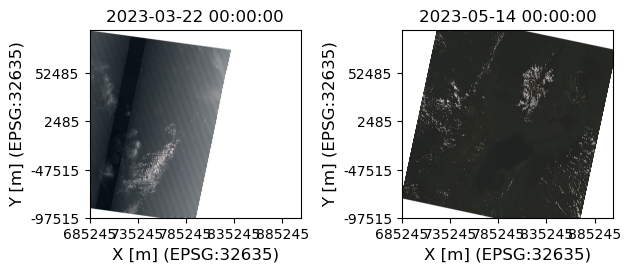

In [6]:
%matplotlib inline  

# the scenes can be plotted
f_scenes = scoll.plot(['red', 'green', 'blue'])

Get values

In [7]:


# Get the values
for scene_id, scene in scoll:
   
    # Get the values from the scene
    df = scene.to_dataframe() #get_values()
    df

(7, 6501, 7308)
(47509308, 7)
(47509308, 7)


c:\Users\ftimcke\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


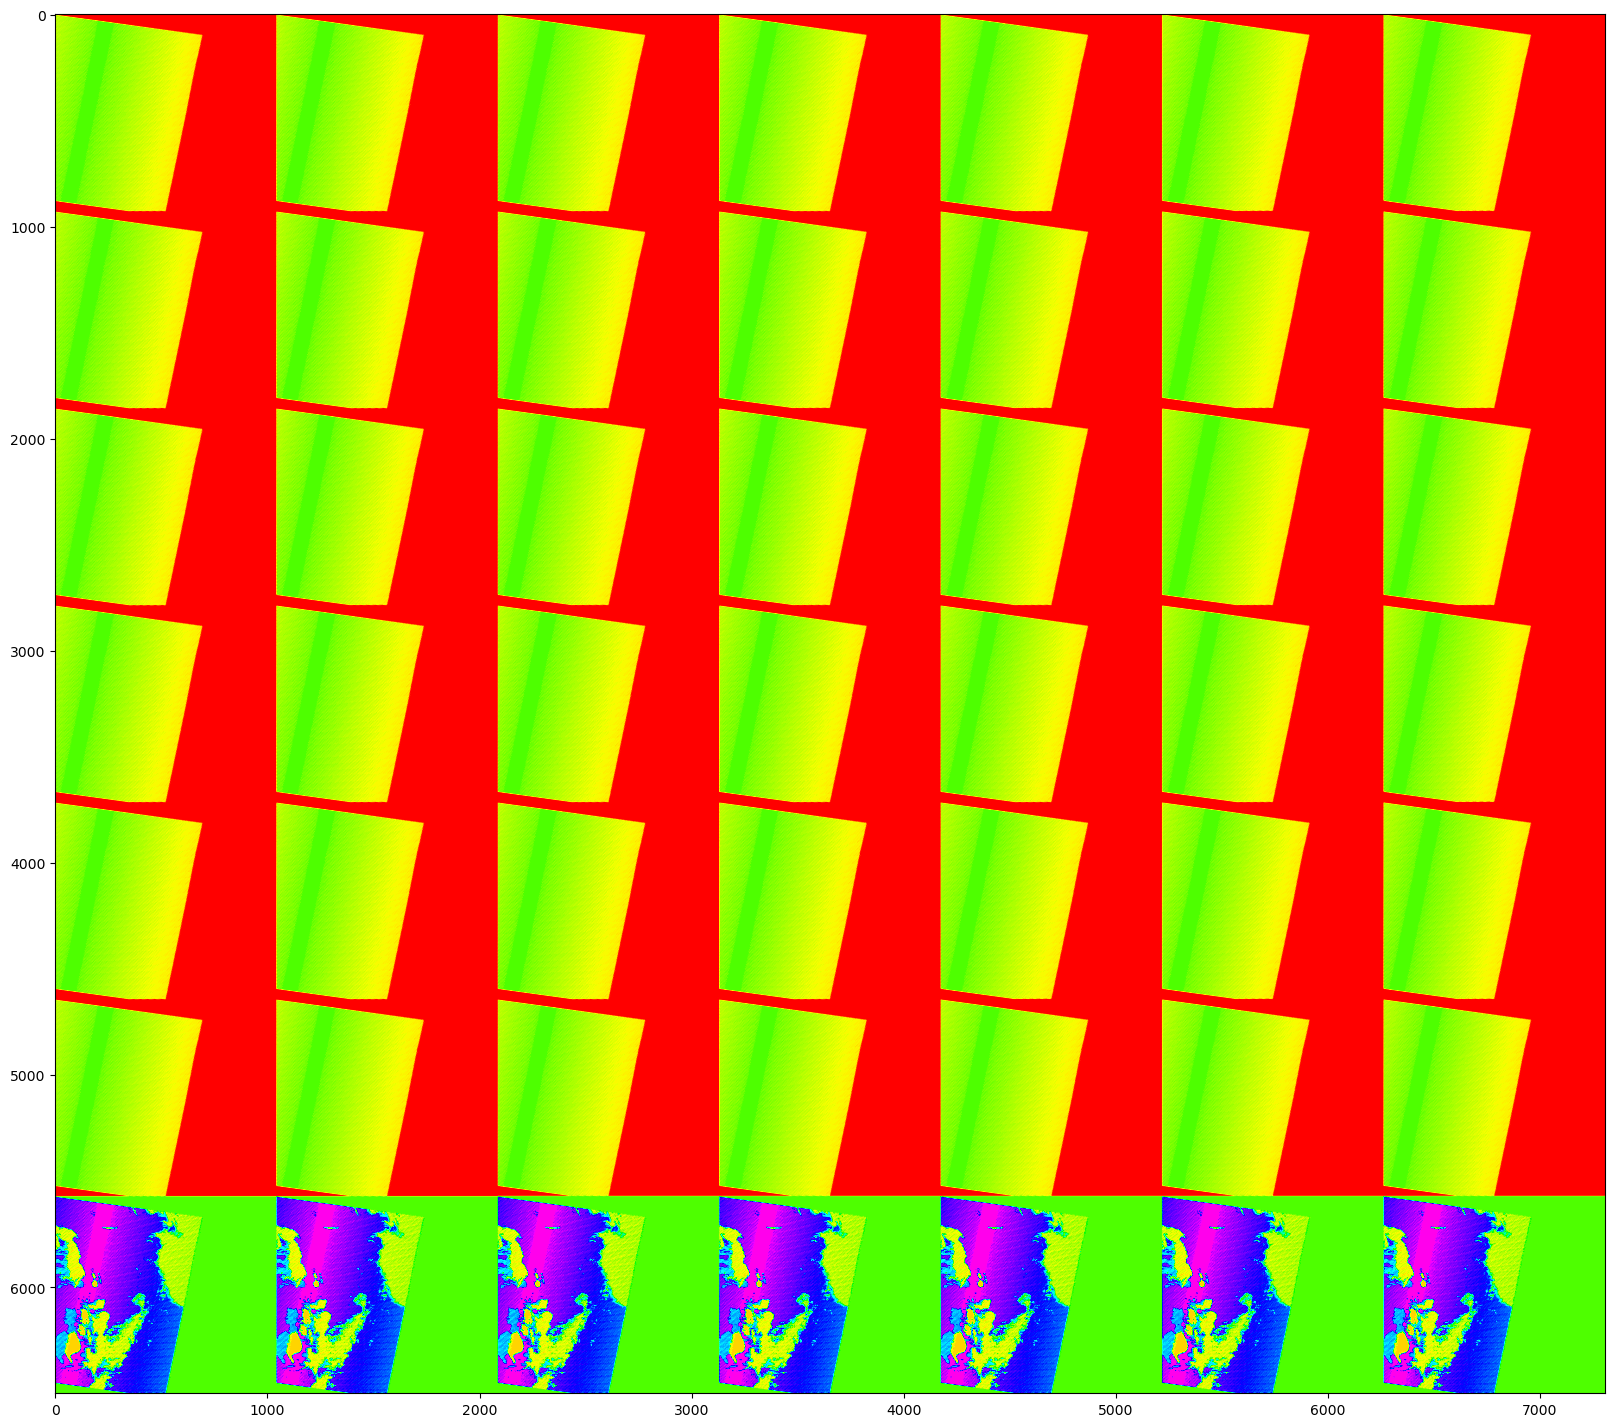

(7, 6501, 7308)
(47509308, 7)
(47509308, 7)


c:\Users\ftimcke\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


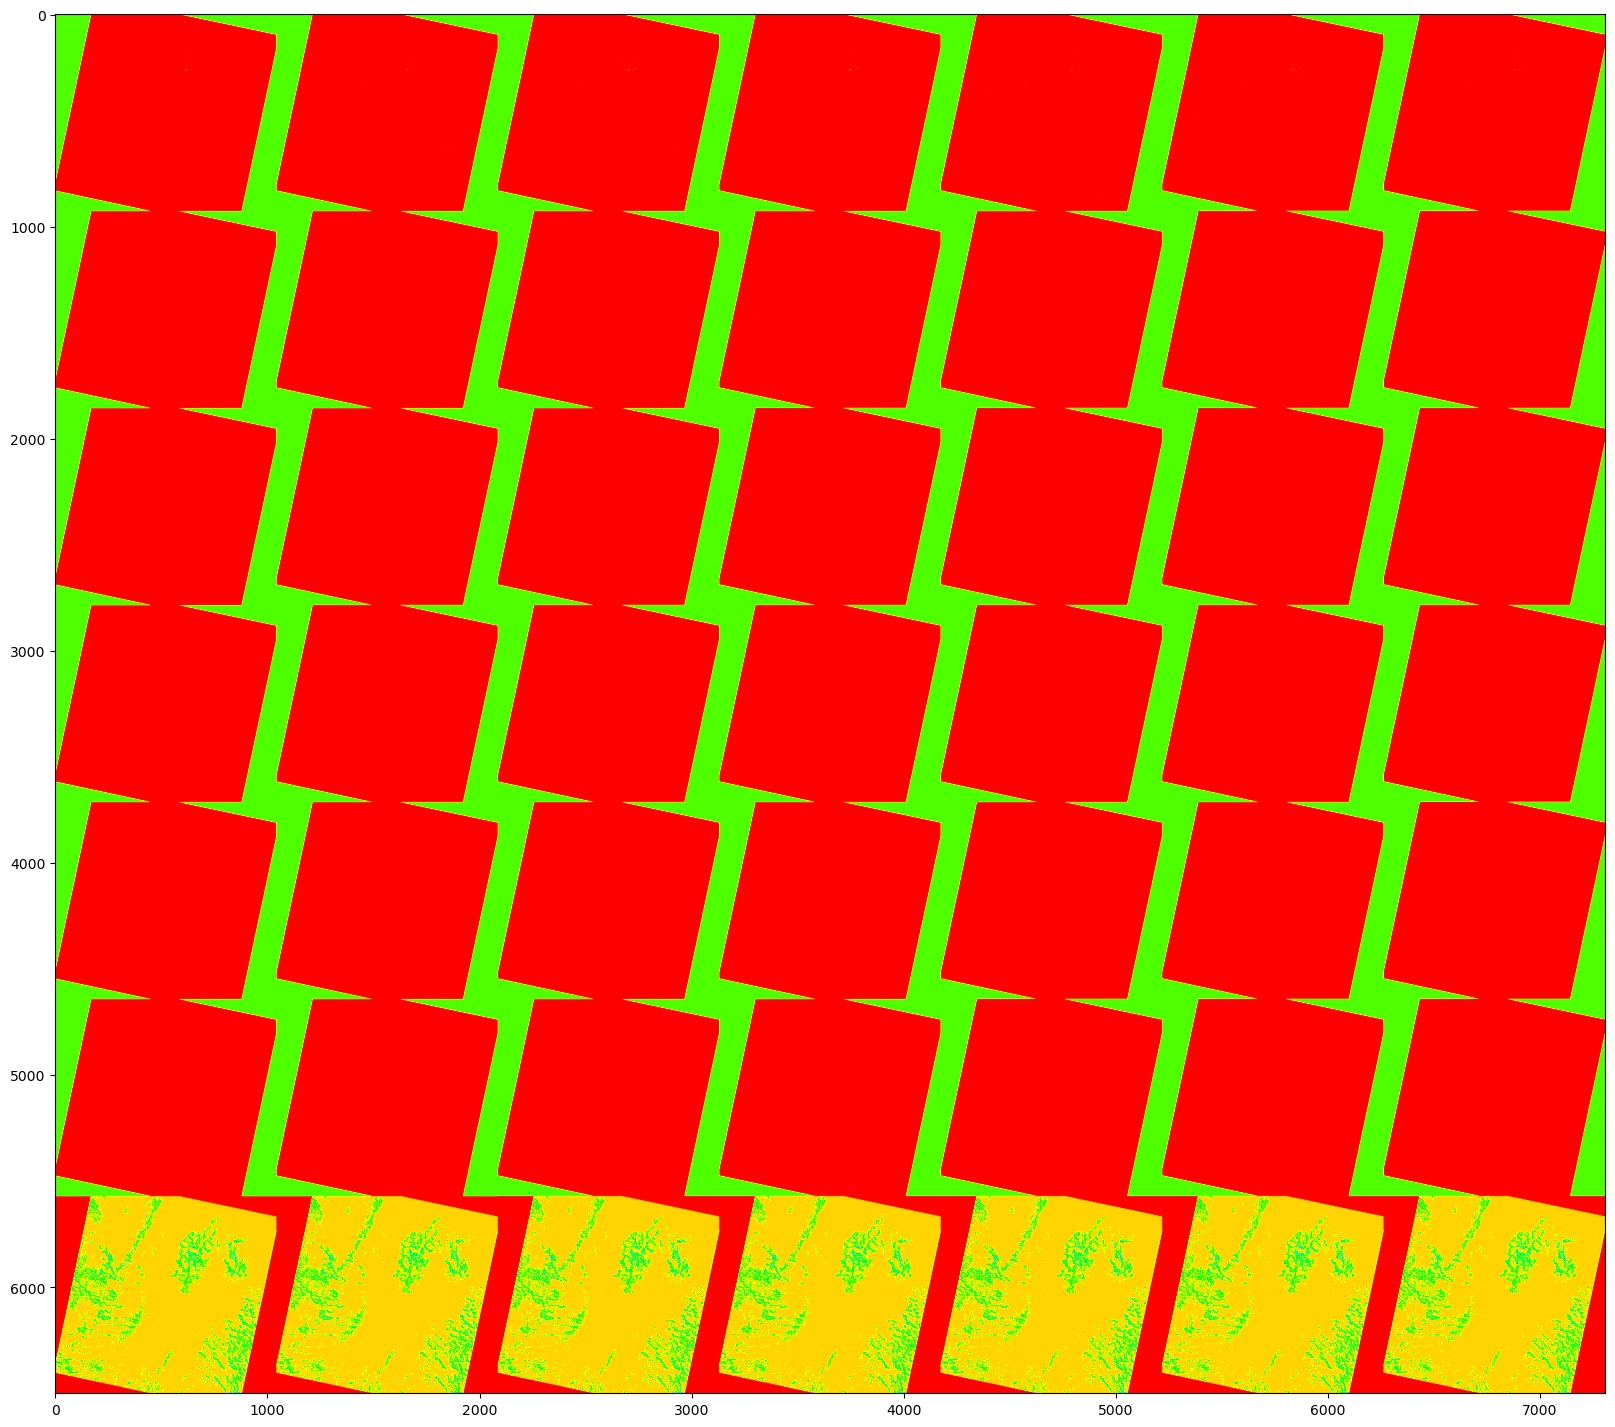

In [ ]:
import numpy as np
from sklearn import cluster
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

%matplotlib inline  

# Specify the fill value
fill_value = -999

# Get the values
for scene_id, scene in scoll:
   
    # Get the values from the scene
    masked_array = scene.to_xarray() #get_values()

    # Convert the masked array to a normal NumPy array with the fill value
    normal_array = masked_array.values#.filled(fill_value)

    # Print the shape of the resulting normal array
    print(normal_array.shape)

    # Define the new shape of the array
    new_shape = (normal_array.shape[1] * normal_array.shape[2], normal_array.shape[0])
    print(new_shape)

    # Reshape the array with the new shape
    X = normal_array.reshape(new_shape)
    print(X.shape)

    inputer = SimpleImputer(strategy='constant', fill_value = fill_value)
    inputed_data = inputer.fit_transform(X)

    # Classify with KMEans
    k_means = cluster.KMeans(n_clusters=8)
    k_means.fit(inputed_data)

    # Get the cluster labels
    X_cluster = k_means.labels_

    # Reshape the cluster labels to match the shape of normal_array[0, :, :]
    X_cluster = X_cluster.reshape(normal_array[0, :, :].shape)


    # Plot the X_cluster containing the labels of

    # Set the figure size for the plot
    plt.figure(figsize=(20, 20))

    # Display the image using the X_cluster array and the "hsv" color map
    plt.imshow(X_cluster, cmap="hsv")

    # Show the plot
    plt.show()
